## Summary

This notebook aims to 
1. load 2 groups of images from folders (label 1: "blurry"; label 2: "clear"), 
2. convert images to matrices, 
3. save as numpy arrays (ready to feed into CNN model)

### Import packages

In [1]:
%run '1_import_packages_functions.ipynb'

/Users/MingTang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.
/Users/MingTang/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Specify image folder

In [2]:
folder_path_clear = '/Users/MingTang/Documents/Data_Science/01_Project/05_Image_CNN/datasets/0_clear_all'
folder_path_blurry = '/Users/MingTang/Documents/Data_Science/01_Project/05_Image_CNN/datasets/1_blurry_all'

print('How many images in total?')
print('Clear images: ', len(os.listdir(folder_path_clear)))
print('Blurry images: ', len(os.listdir(folder_path_blurry)))

How many images in total?
Clear images:  4195
Blurry images:  4331


### Load data
Load 1000 clear images and 100 blurry images

In [3]:
print('\nLoading clear images\n---')
X_clear, y_clear = image_to_array(folder_path_clear, 0, 1000)

print('Loading blurry images\n---')
X_blurry, y_blurry = image_to_array(folder_path_blurry, 1, 1000)

# Combine arraies together
X = np.concatenate((X_clear,X_blurry), axis=0)
y = np.concatenate((y_clear,y_blurry), axis=0)

print('\nData collection is done!')


Loading clear images
---
Adjusted image size - (200, 200) | filename - 100_1822.jpg
Adjusted image size - (200, 200) | filename - 100_1830.jpg
Adjusted image size - (200, 200) | filename - 100_2080.JPG
100 images loaded so far
200 images loaded so far
300 images loaded so far
400 images loaded so far
500 images loaded so far
600 images loaded so far
700 images loaded so far
800 images loaded so far
900 images loaded so far
---
 1000 images in this folder

Loading blurry images
---
Adjusted image size - (200, 200) | filename -  DiskR20_10.jpg
Adjusted image size - (200, 200) | filename -  DiskR20_11.jpg
Adjusted image size - (200, 200) | filename -  DiskR20_12.jpg
100 images loaded so far
200 images loaded so far
300 images loaded so far
400 images loaded so far
500 images loaded so far
600 images loaded so far
700 images loaded so far
800 images loaded so far
900 images loaded so far
---
 1000 images in this folder


Data collection is done!


### Check images from the folder

Example clear image


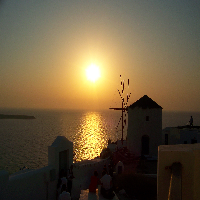

Example blurry image


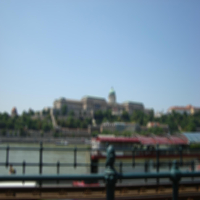

In [4]:
image_index = 0

print('Example clear image')
file_name = str(os.listdir(folder_path_clear)[image_index])
image_path = folder_path_clear + '/' + file_name
img = image.load_img(image_path, target_size=(200, 200))
img

print('Example blurry image')
file_name = str(os.listdir(folder_path_blurry)[image_index])
image_path = folder_path_blurry + '/' + file_name
img = image.load_img(image_path, target_size=(200, 200))
img

### Reconstruct image from matrix
Convert a matrix into a grayscale (RGB) image (to ensure that matrix is fine)

The pic is blurry


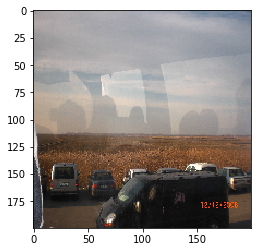

In [5]:
# Code source: https://stackoverflow.com/questions/7694772/turning-a-large-matrix-into-a-grayscale-image
# Code source: https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

image_id = 11
X_check = X[image_id].astype('float32')
y_check = y[image_id] # [1,0] - clear; [0,1] - blurry

#     print('X_check.shape -', X_check.shape)
#     print('y_check.shape -', y_check.shape, '\n')

if y_check == int(to_categorical(y_blurry)[0,0]):
    print('The pic is blurry')
elif y_check == int(to_categorical(y_clear)[0,0]):
    print('The pic is clear')
else:
    print('Somthing is wrong')
    pass

plt.imshow(X[image_id], cmap=plt.get_cmap('gray'))
plt.show()

# Preprocess the data

### Normalization

In [6]:
X = np.stack(X)
X = X.astype('float32')
X = X/255

y = to_categorical(y)

np.array(X).shape
np.array(y).shape

(2000, 200, 200, 3)

(2000, 2)

### Statistical check

In [7]:
stats = [np.min, np.max, np.mean, np.std]
stats_str = ['min -', 'max -', 'mean- ', 'std -']
print('X')
for index, stat in enumerate(stats):
    print(stats_str[index], stat(X))
print('y')
for index, stat in enumerate(stats):
    print(stats_str[index], stat(y))

X
min - 0.0
max - 1.0
mean-  0.483634
std - 0.253723
y
min - 0.0
max - 1.0
mean-  0.5
std - 0.5


### Save as arrays

In [8]:
np.save('X_2-labels_clear-1000_blurry-1000.npy', X)
np.save('y_2-labels_clear-1000_blurry-1000.npy', y)